In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
sns.set()

%matplotlib inline
plt.style.use('ggplot')

In [2]:
os.chdir("C:\\Users\\Taha\\Algoix")
print(os.getcwd())

C:\Users\Taha\Algoix


In [3]:
bar=pd.read_csv("bar.csv")
quote=pd.read_csv("quote.csv")
rating=pd.read_csv("rating.csv")
news=pd.read_csv("news.csv")

### TASK 1

In [4]:
#SET TIMESTAMPS AND INDICES
bar['time']=pd.to_datetime(bar['time'])
bar.set_index('time', inplace=True)
bar = bar.sort_index()
quote['time']=pd.to_datetime(quote['time'])
quote.set_index('time', inplace=True)
quote = quote.sort_index()


In [5]:
#FIND COMMON PERIODS IN BOTH THE DATASETS
common=list(set.intersection(set(bar.index),set(quote.index)))
common=pd.to_datetime(common)
common=common.sort_values()
start=(common[0])
end=(common[len(common)-1])
print("start : ",start)
print("end : ",end)

start :  2020-08-05 13:40:00+00:00
end :  2020-08-05 20:20:00+00:00


In [6]:
common_stocks=list(set.intersection(set(bar.symbol),set(quote.ticker)))

In [7]:
def analyse(stock):
    ##BAR DATASET
    #FILTER DATA BETWEEN COMMON PERIODS
    bar30=bar.loc[start:end]
    bar30=bar30[bar30['symbol']==stock].head(30)
    end2=bar30.index[-1]
    
    #FILTER  TOP 30 DATA OF THE STOCK NEEDED
    bar30=bar30[bar30['symbol']==stock].head(30)
 
    ##QUOTE DATASET
    #FILTER DATA BETWEEN COMMON PERIODS
    quote30=quote.loc[start:end2]
    
    #FILTER  TOP 30 DATA OF THE STOCK NEEDED
    quote30=quote30[quote30['ticker']==stock]
    
    print("DATA ANALYTICS")
    display(quote30.describe())
    display(bar30.describe())
    
    print("GRAPHICAL ANALYTICS")
    #PLOT GRAPH OF AVERAGE_PRICE
    bar30['average_price'].plot(color='crimson',figsize=(12,5))
    plt.title("average")
    plt.xticks(rotation=70)
    plt.show()
    
    #PLOT GRAPH OF AVERAGE_PRICE,BID_PRICE
    bar30['average_price'].plot(color='green',label='average_price',figsize=(12,5))
    quote30['bid_price'].plot(color='orange',label='bid_price')
    plt.xticks(rotation=70)
    plt.legend()
    plt.show()
    
    #PLOT GRAPH OF ASK_PRICE,BID_PRICE,AVERAGE_PRICE
    quote30['ask_price'].plot(color='turquoise',label='ask_price',figsize=(120,5))
    quote30['bid_price'].plot(color='orange',label='bid_price')
    bar30['average_price'].plot(color='crimson',label='average_price')
    plt.title("COMPARE ASK_PRICE,BID_PRICE,AVERAGE_PRICE")
    plt.xticks(rotation=70)
    plt.legend()
    plt.show()

Choose a stock from the below list  ['BBY', 'AKAM', 'DHR', 'GOOG', 'C', 'AIV', 'BWA', 'CTL', 'CNP', 'AES', 'ALXN', 'CLX', 'AVB', 'DLR', 'CMI', 'DXCM', 'ATO', 'BRK.B', 'ALB', 'CTVA', 'DISCK', 'ANET', 'GLW', 'BLL', 'CBRE', 'ESS', 'BKNG', 'DVA', 'APH', 'BKR', 'ETFC', 'ED', 'RE', 'ADBE', 'EMN', 'AAL', 'CVX', 'EA', 'CCI', 'EIX', 'AMP', 'APTV', 'ALGN', 'AME', 'ALL', 'XRAY', 'DTE', 'EMR', 'ADI', 'COP', 'CB', 'CPB', 'CINF', 'CAH', 'BSX', 'DG', 'DFS', 'ACN', 'KO', 'AEE', 'BF.B', 'COO', 'ALLE', 'BIIB', 'DVN', 'CDW', 'AVY', 'COST', 'AMCR', 'CERN', 'ADP', 'ATVI', 'ANSS', 'EFX', 'APA', 'AWK', 'CTAS', 'DXC', 'BK', 'AON', 'CTXS', 'ETN', 'AXP', 'AAP', 'ADSK', 'CAT', 'DRI', 'ANTM', 'ADM', 'AJG', 'CPRT', 'COTY', 'BMY', 'DLTR', 'CBOE', 'AZO', 'CDNS', 'AVGO', 'CFG', 'ALK', 'BAC', 'D', 'MMM', 'CTSH', 'CF', 'CMS', 'EW', 'CHRW', 'APD', 'SCHW', 'DHI', 'CI', 'ABBV', 'DISH', 'CMG', 'ARE', 'EQIX', 'BDX', 'CHTR', 'COF', 'DE', 'DD', 'DRE', 'AMT', 'CAG', 'AMD', 'EVRG', 'AOS', 'FANG', 'DOV', 'A', 'EL', 'CSX', 'ECL',

,bid_price,bid_size,ask_price,ask_size
count,4054.000000,4054.000000,4054.000000,4054.000000
mean,56.105089,1.433399,56.436211,1.574741
std,0.202801,0.986151,0.652188,1.095136
min,53.860000,1.000000,56.010000,1.000000
25%,56.060000,1.000000,56.210000,1.000000
50%,56.130000,1.000000,56.290000,1.000000
75%,56.180000,1.000000,56.360000,1.000000
max,56.320000,5.000000,59.000000,6.000000


,volume,accumulated_volume,VWAP,open_price,high_price,low_price,close_price,average_price,epoch_time_at_the_beginning,epoch_time_at_the_ending
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,3.000000e+01,3.000000e+01
mean,533.333333,23758.766667,56.152703,56.149333,56.169333,56.133667,56.155000,56.324730,1.596636e+12,1.596636e+12
std,352.526970,4403.539248,0.061355,0.066976,0.062900,0.062793,0.062187,0.037298,5.707672e+05,5.707672e+05
min,103.000000,14663.000000,56.023300,56.010000,56.040000,56.010000,56.020000,56.282100,1.596635e+12,1.596635e+12
25%,282.750000,20208.000000,56.119400,56.122500,56.131250,56.112500,56.130000,56.295750,1.596635e+12,1.596635e+12
50%,500.000000,24548.500000,56.155850,56.150000,56.165000,56.140000,56.155000,56.311000,1.596636e+12,1.596636e+12
75%,668.500000,27144.750000,56.196400,56.190000,56.207500,56.177500,56.197500,56.352400,1.596636e+12,1.596636e+12
max,1546.000000,29862.000000,56.268200,56.290000,56.290000,56.270000,56.270000,56.413900,1.596637e+12,1.596637e+12


GRAPHICAL ANALYTICS


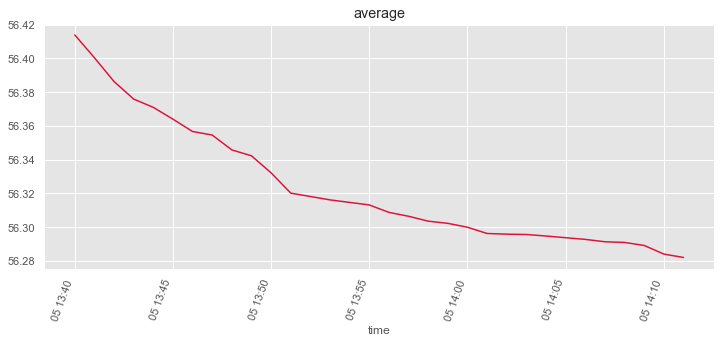

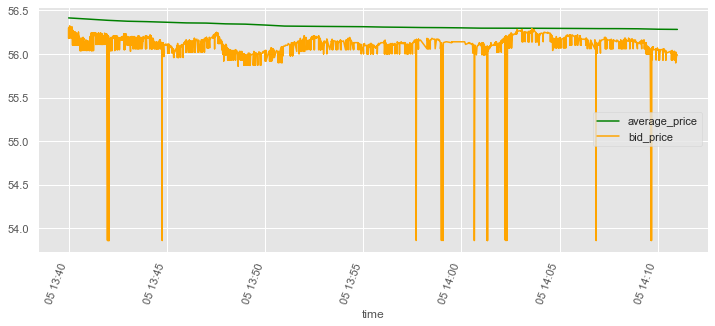

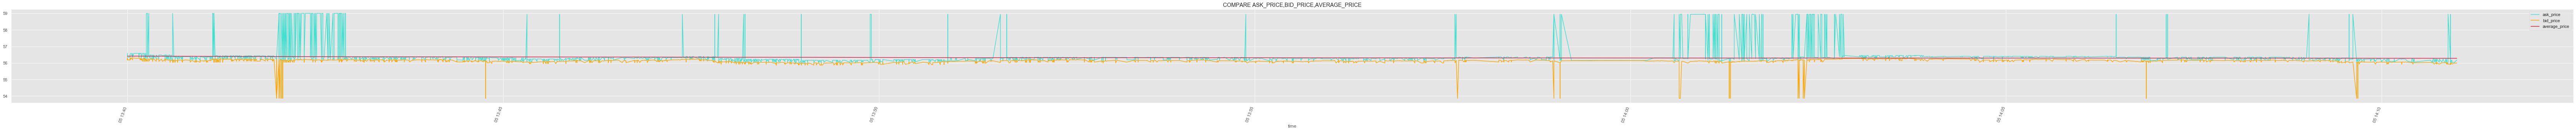

In [8]:
print("Choose a stock from the below list ",common_stocks)
stock=input('')
if common_stocks.count(stock)!=0:
    analyse(stock)
else:
    print("The stock does not exist in both bar & quote dataset,you may get incomplete results.")
    analyse(stock)

## TASK 2

In [11]:
display(rating)
display(bar)

,symbol,ratingBuy,ratingOverweight,ratingHold,ratingUnderweight,ratingSell,ratingNone,ratingScaleMark,consensusStartDate,consensusEndDate
0,ABC,9,1,7,1,0,0,1.500000,2020-08-28 00:00:00+00:00,2020-08-31 00:00:00+00:00
1,BMY,7,2,6,0,0,0,1.466667,2020-08-27 00:00:00+00:00,2020-08-27 00:00:00+00:00
2,O,7,1,9,0,0,0,1.558824,2020-08-27 00:00:00+00:00,2020-08-31 00:00:00+00:00
3,DRI,19,1,11,0,0,0,1.370968,2020-08-26 00:00:00+00:00,2020-08-26 00:00:00+00:00
4,TMUS,19,2,5,1,0,0,1.277778,2020-08-26 00:00:00+00:00,2020-08-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
973,CPRT,6,1,3,0,0,0,1.350000,2020-04-22 00:00:00+00:00,2020-06-28 00:00:00+00:00
974,PG,12,1,8,1,0,0,1.454545,2020-04-20 00:00:00+00:00,2020-07-16 00:00:00+00:00
975,ORLY,11,0,9,2,0,0,1.545455,2020-04-20 00:00:00+00:00,2020-07-12 00:00:00+00:00
976,ICE,17,2,1,0,0,0,1.100000,2020-04-16 00:00:00+00:00,2020-08-04 00:00:00+00:00


,symbol,volume,accumulated_volume,VWAP,open_price,high_price,low_price,close_price,average_price,epoch_time_at_the_beginning,epoch_time_at_the_ending
time,,,,,,,,,,,
2020-08-03 14:46:00+00:00,TT,640,53732,112.2325,112.14,112.280,112.14,112.280,112.1783,1596465960000,1596466020000
2020-08-03 14:46:00+00:00,EA,300,30988,142.7050,142.69,142.715,142.69,142.715,141.2862,1596465960000,1596466020000
2020-08-03 14:46:00+00:00,DRE,202,25458,39.3202,39.32,39.320,39.32,39.320,39.4497,1596465960000,1596466020000
2020-08-03 14:46:00+00:00,L,1000,79894,35.3560,35.36,35.360,35.32,35.360,35.2247,1596465960000,1596466020000
2020-08-03 14:46:00+00:00,RHI,500,9932,51.2120,51.21,51.210,51.21,51.210,50.9929,1596465960000,1596466020000
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-09 11:14:00+00:00,UAL,100,100,36.6900,36.69,36.690,36.69,36.690,36.6900,1599650040000,1599650100000
2020-09-09 11:17:00+00:00,FB,100,110,274.0300,274.03,274.030,274.03,274.030,274.2073,1599650220000,1599650280000
2020-09-09 11:18:00+00:00,NFLX,700,705,518.5400,518.44,518.740,518.29,518.740,518.5252,1599650280000,1599650340000


In [15]:
#df=pd.DataFame(columns=['symbol', 'ratingBuy','ratingScaleMark','Mean_Average_Price','consensusStartDate', 'consensusEndDate'])
df=rating[['symbol', 'ratingBuy','ratingScaleMark','consensusStartDate', 'consensusEndDate']]
df['meanAveragePrice']=for i in
print(rating.columns)
print(bar.columns)
df

Index(['symbol', 'ratingBuy', 'ratingOverweight', 'ratingHold',
       'ratingUnderweight', 'ratingSell', 'ratingNone', 'ratingScaleMark',
       'consensusStartDate', 'consensusEndDate'],
      dtype='object')
Index(['symbol', 'volume', 'accumulated_volume', 'VWAP', 'open_price',
       'high_price', 'low_price', 'close_price', 'average_price',
       'epoch_time_at_the_beginning', 'epoch_time_at_the_ending'],
      dtype='object')


C:\Users\Taha\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,symbol,ratingBuy,ratingScaleMark,consensusStartDate,consensusEndDate,meanAveragePrice
0,ABC,9,1.500000,2020-08-28 00:00:00+00:00,2020-08-31 00:00:00+00:00,0
1,BMY,7,1.466667,2020-08-27 00:00:00+00:00,2020-08-27 00:00:00+00:00,0
2,O,7,1.558824,2020-08-27 00:00:00+00:00,2020-08-31 00:00:00+00:00,0
3,DRI,19,1.370968,2020-08-26 00:00:00+00:00,2020-08-26 00:00:00+00:00,0
4,TMUS,19,1.277778,2020-08-26 00:00:00+00:00,2020-08-26 00:00:00+00:00,0
...,...,...,...,...,...,...
973,CPRT,6,1.350000,2020-04-22 00:00:00+00:00,2020-06-28 00:00:00+00:00,0
974,PG,12,1.454545,2020-04-20 00:00:00+00:00,2020-07-16 00:00:00+00:00,0
975,ORLY,11,1.545455,2020-04-20 00:00:00+00:00,2020-07-12 00:00:00+00:00,0
976,ICE,17,1.100000,2020-04-16 00:00:00+00:00,2020-08-04 00:00:00+00:00,0


## Consider a subset ( 30 rows) of @bar. How do 'bidprice', 'askprice', 'average_price' of any stock ( any symbol) are moving in that subset period? Maybe you can try for ‘2020-08-05’. Graphical and data analysis. Dataset @quote @bar dataset
## make a table [symbol,ratingBuy,ratingScaleMark,mean of average_price,consensusStartDate,consensusEndDate] from @rating and @bar dataset
## 'average_price' column @bar dataset. How average price changes over 'consensusStartDate' an 'consensusEndDate' from @rating dataset.Graph
## How the 'average_price' @bar dataset changes a few days before and after the 'reportDate' for any stock. Graphical.
## pull 'priceTargetAverage' column from @target dataset. Changes of 'priceTargetAverage' around 'reportDate' from @event dataset on or before. Show by table.
## need to add the 'average_price' at updated date from @bar dataset
## need to find the trend in price prior and post updated date
## [present trend vs.prior trend]. ranking.up/down.
## 'datetime' upto minute ['2020-08-12 11:31'] and @averageprice at that time from @bar dataset. [datetime,stock,summary,averageprice] from @bar and @news dataset